In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
from mle_toolbox import load_result_logs, visualize
from neuroevobench.postprocess import filter_log
from neuroevobench.postprocess import plot_task, plot_sensitivity

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### Load Hyper & Meta-Log

In [2]:
meta_log, hyper_log = load_result_logs("experiments/brax_swish")

env_names = hyper_log.env_name.unique()
strategy_names = hyper_log.strategy_name.unique()

hyper_log

/Users/rob/anaconda3/envs/mle-toolbox/lib/python3.9/site-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


       env_name strategy_name   time_elapsed       run_id  test_eval_perf                                          log_paths                      experiment_dir                                       config_fname                                         model_ckpt  seeds model_type                                          log_fname
0           ant        OpenES  367854.018832   b_1_eval_0     3703.541992  experiments/brax_swish/b_1_eval_0/logs/log_see...   experiments/brax_swish/b_1_eval_0  experiments/brax_swish/b_1_eval_0/b_1_eval_0.yaml  experiments/brax_swish/b_1_eval_0/models/final...      0        jax  experiments/brax_swish/b_1_eval_0/logs/b_1_eva...
1           ant          SNES  367854.018832   b_1_eval_1     3117.911133  experiments/brax_swish/b_1_eval_1/logs/log_see...   experiments/brax_swish/b_1_eval_1  experiments/brax_swish/b_1_eval_1/b_1_eval_1.yaml  experiments/brax_swish/b_1_eval_1/models/final...      0        jax  experiments/brax_swish/b_1_eval_1/logs/b_1_eva...
2   

### Get results for a single task env

In [3]:
env_name = "ant"
metric = "test_eval_perf"
env_results = {}

for strategy in strategy_names:
    env_results[strategy] = filter_log(hyper_log, meta_log, env_name, strategy, metric)
env_results = dict(sorted(env_results.items()))
env_results.keys()

dict_keys(['ARS', 'OpenES', 'PGPE', 'SNES', 'Sep_CMA_ES'])

### Plot results for all task envs

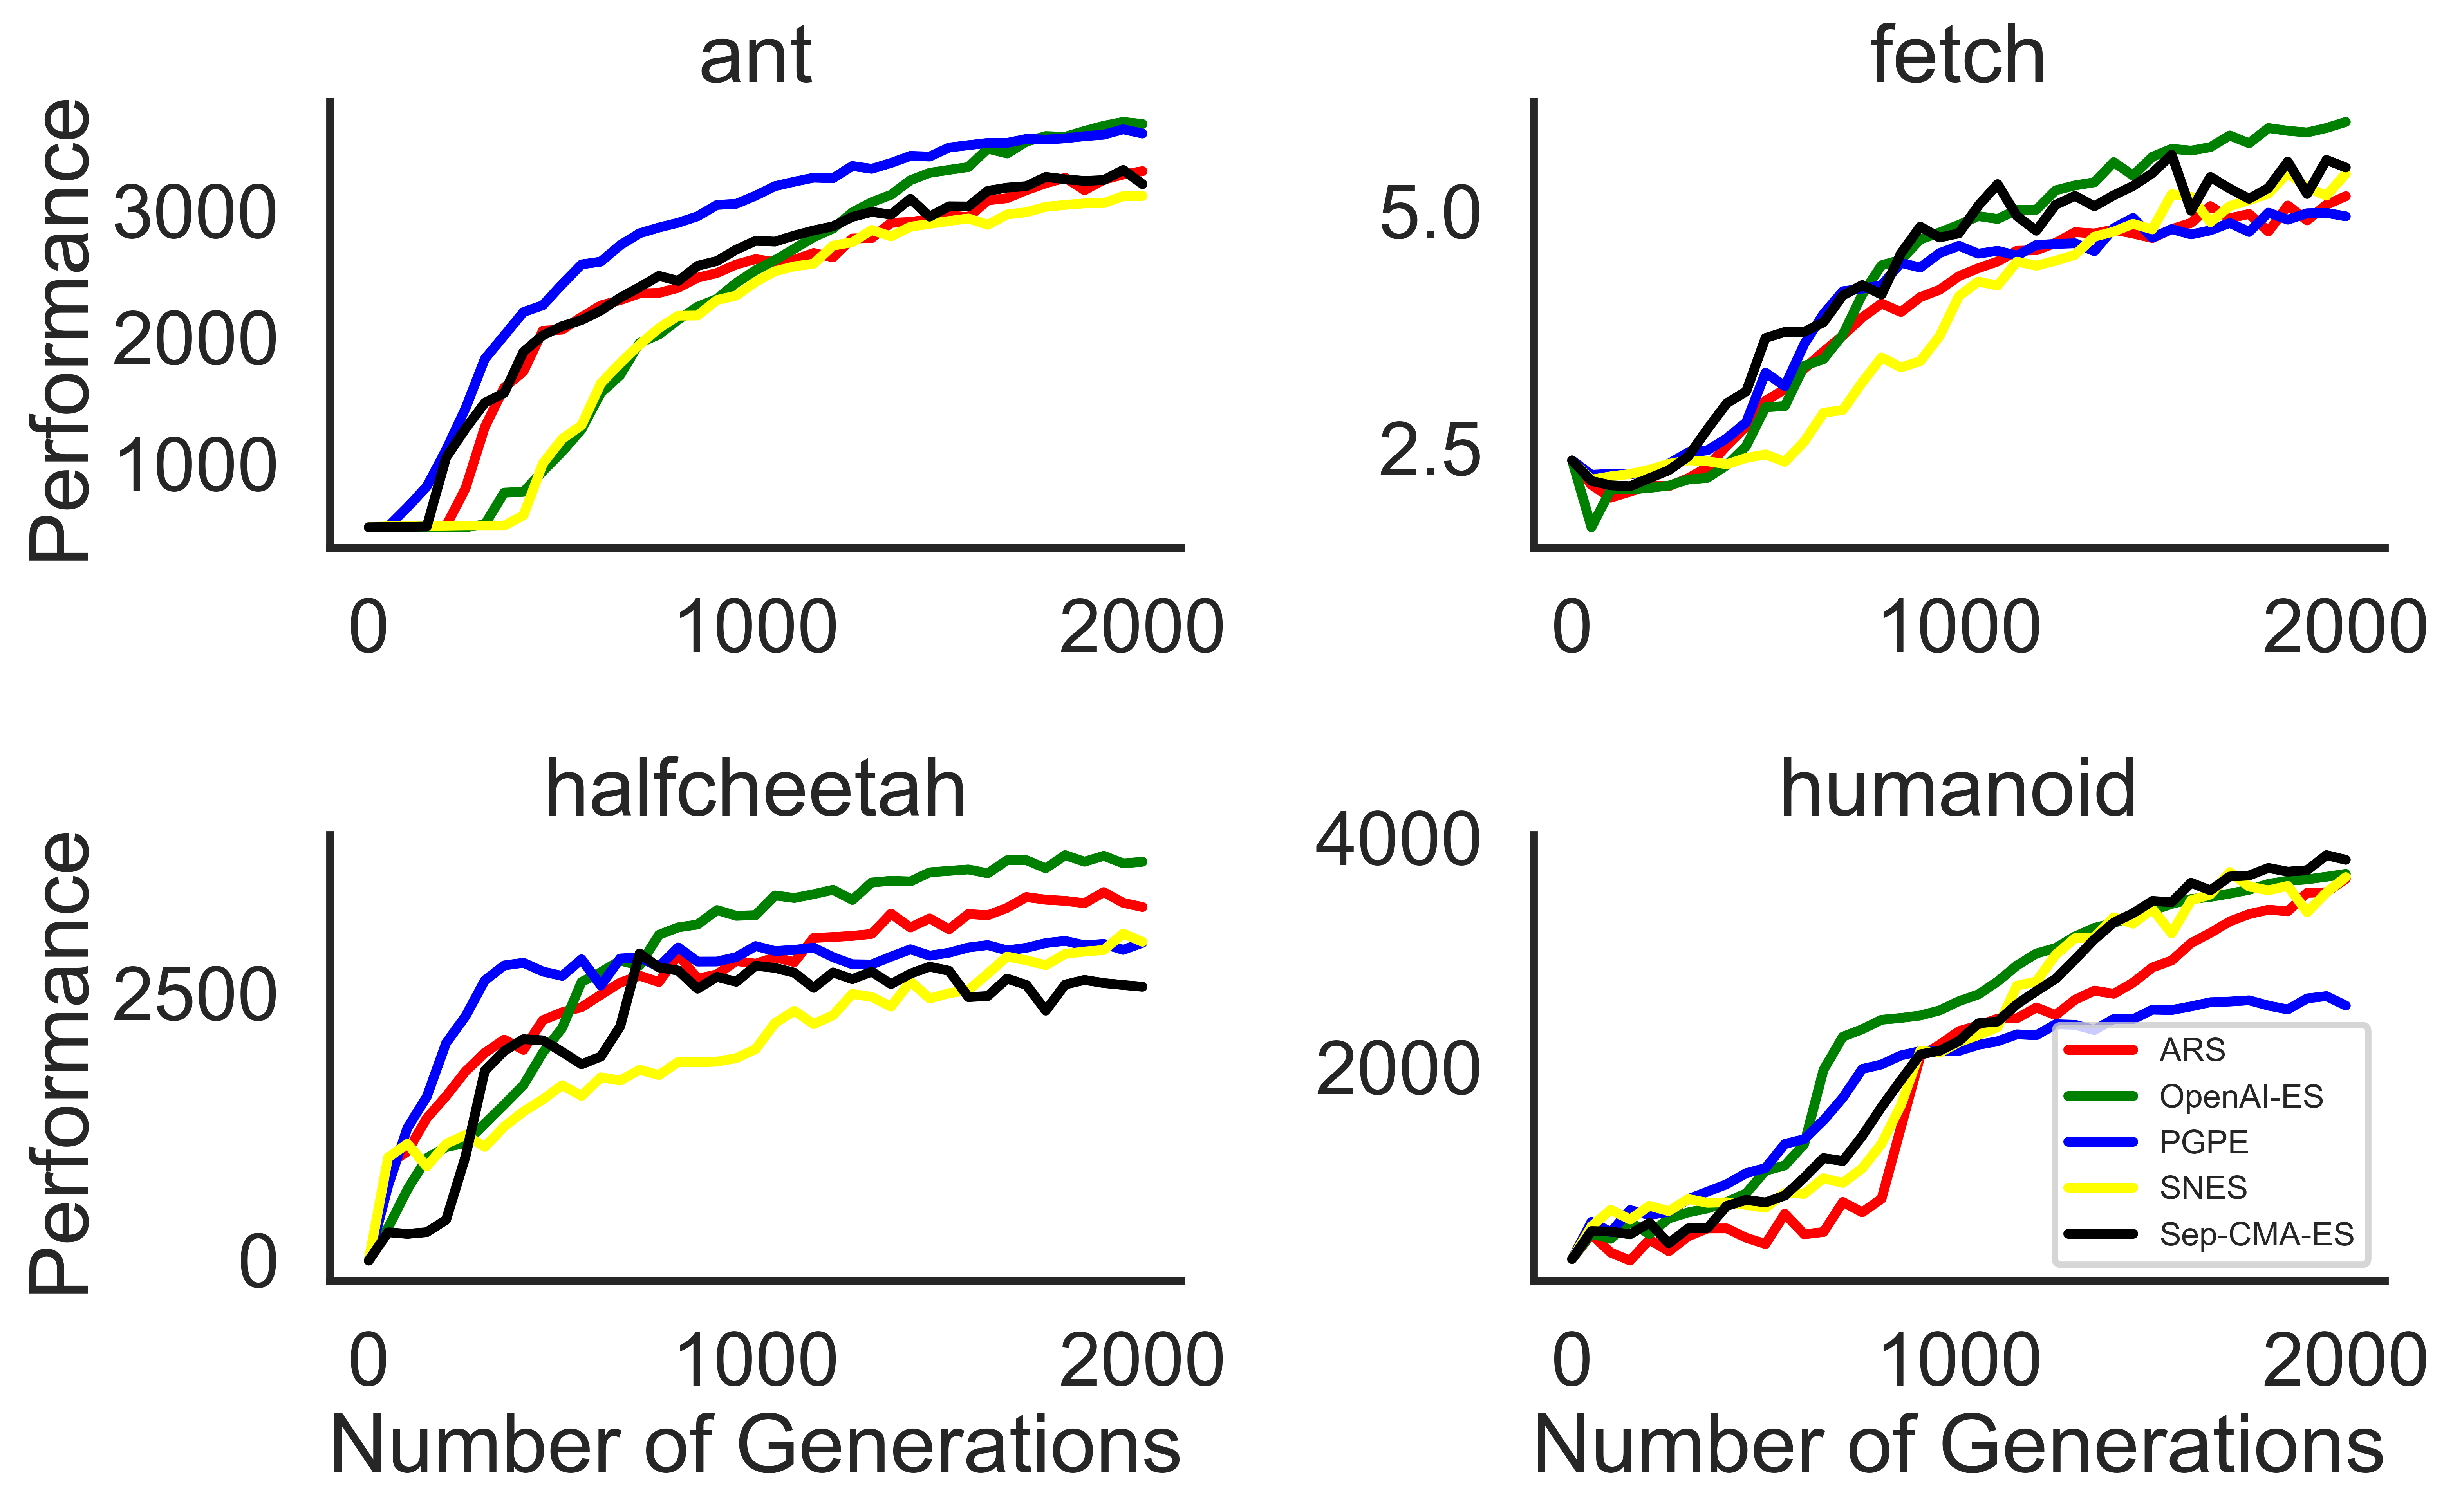

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(11, 7))

i = 0
for env_name, ax in zip(env_names, axs.flatten()):
    env_results = {}
    for strategy in strategy_names:
        env_results[strategy] = filter_log(hyper_log, meta_log, env_name, strategy, metric)
    env_results = dict(sorted(env_results.items()))

    plot_task(env_results, fig, ax, title=env_name,
              plot_ylabel=(i==0 or i==2),
              plot_xlabel=(i==2 or i==3),
              plot_legend=(i==3))
    i += 1

fig.tight_layout()

### Plot Hyperparameter Sensitivity

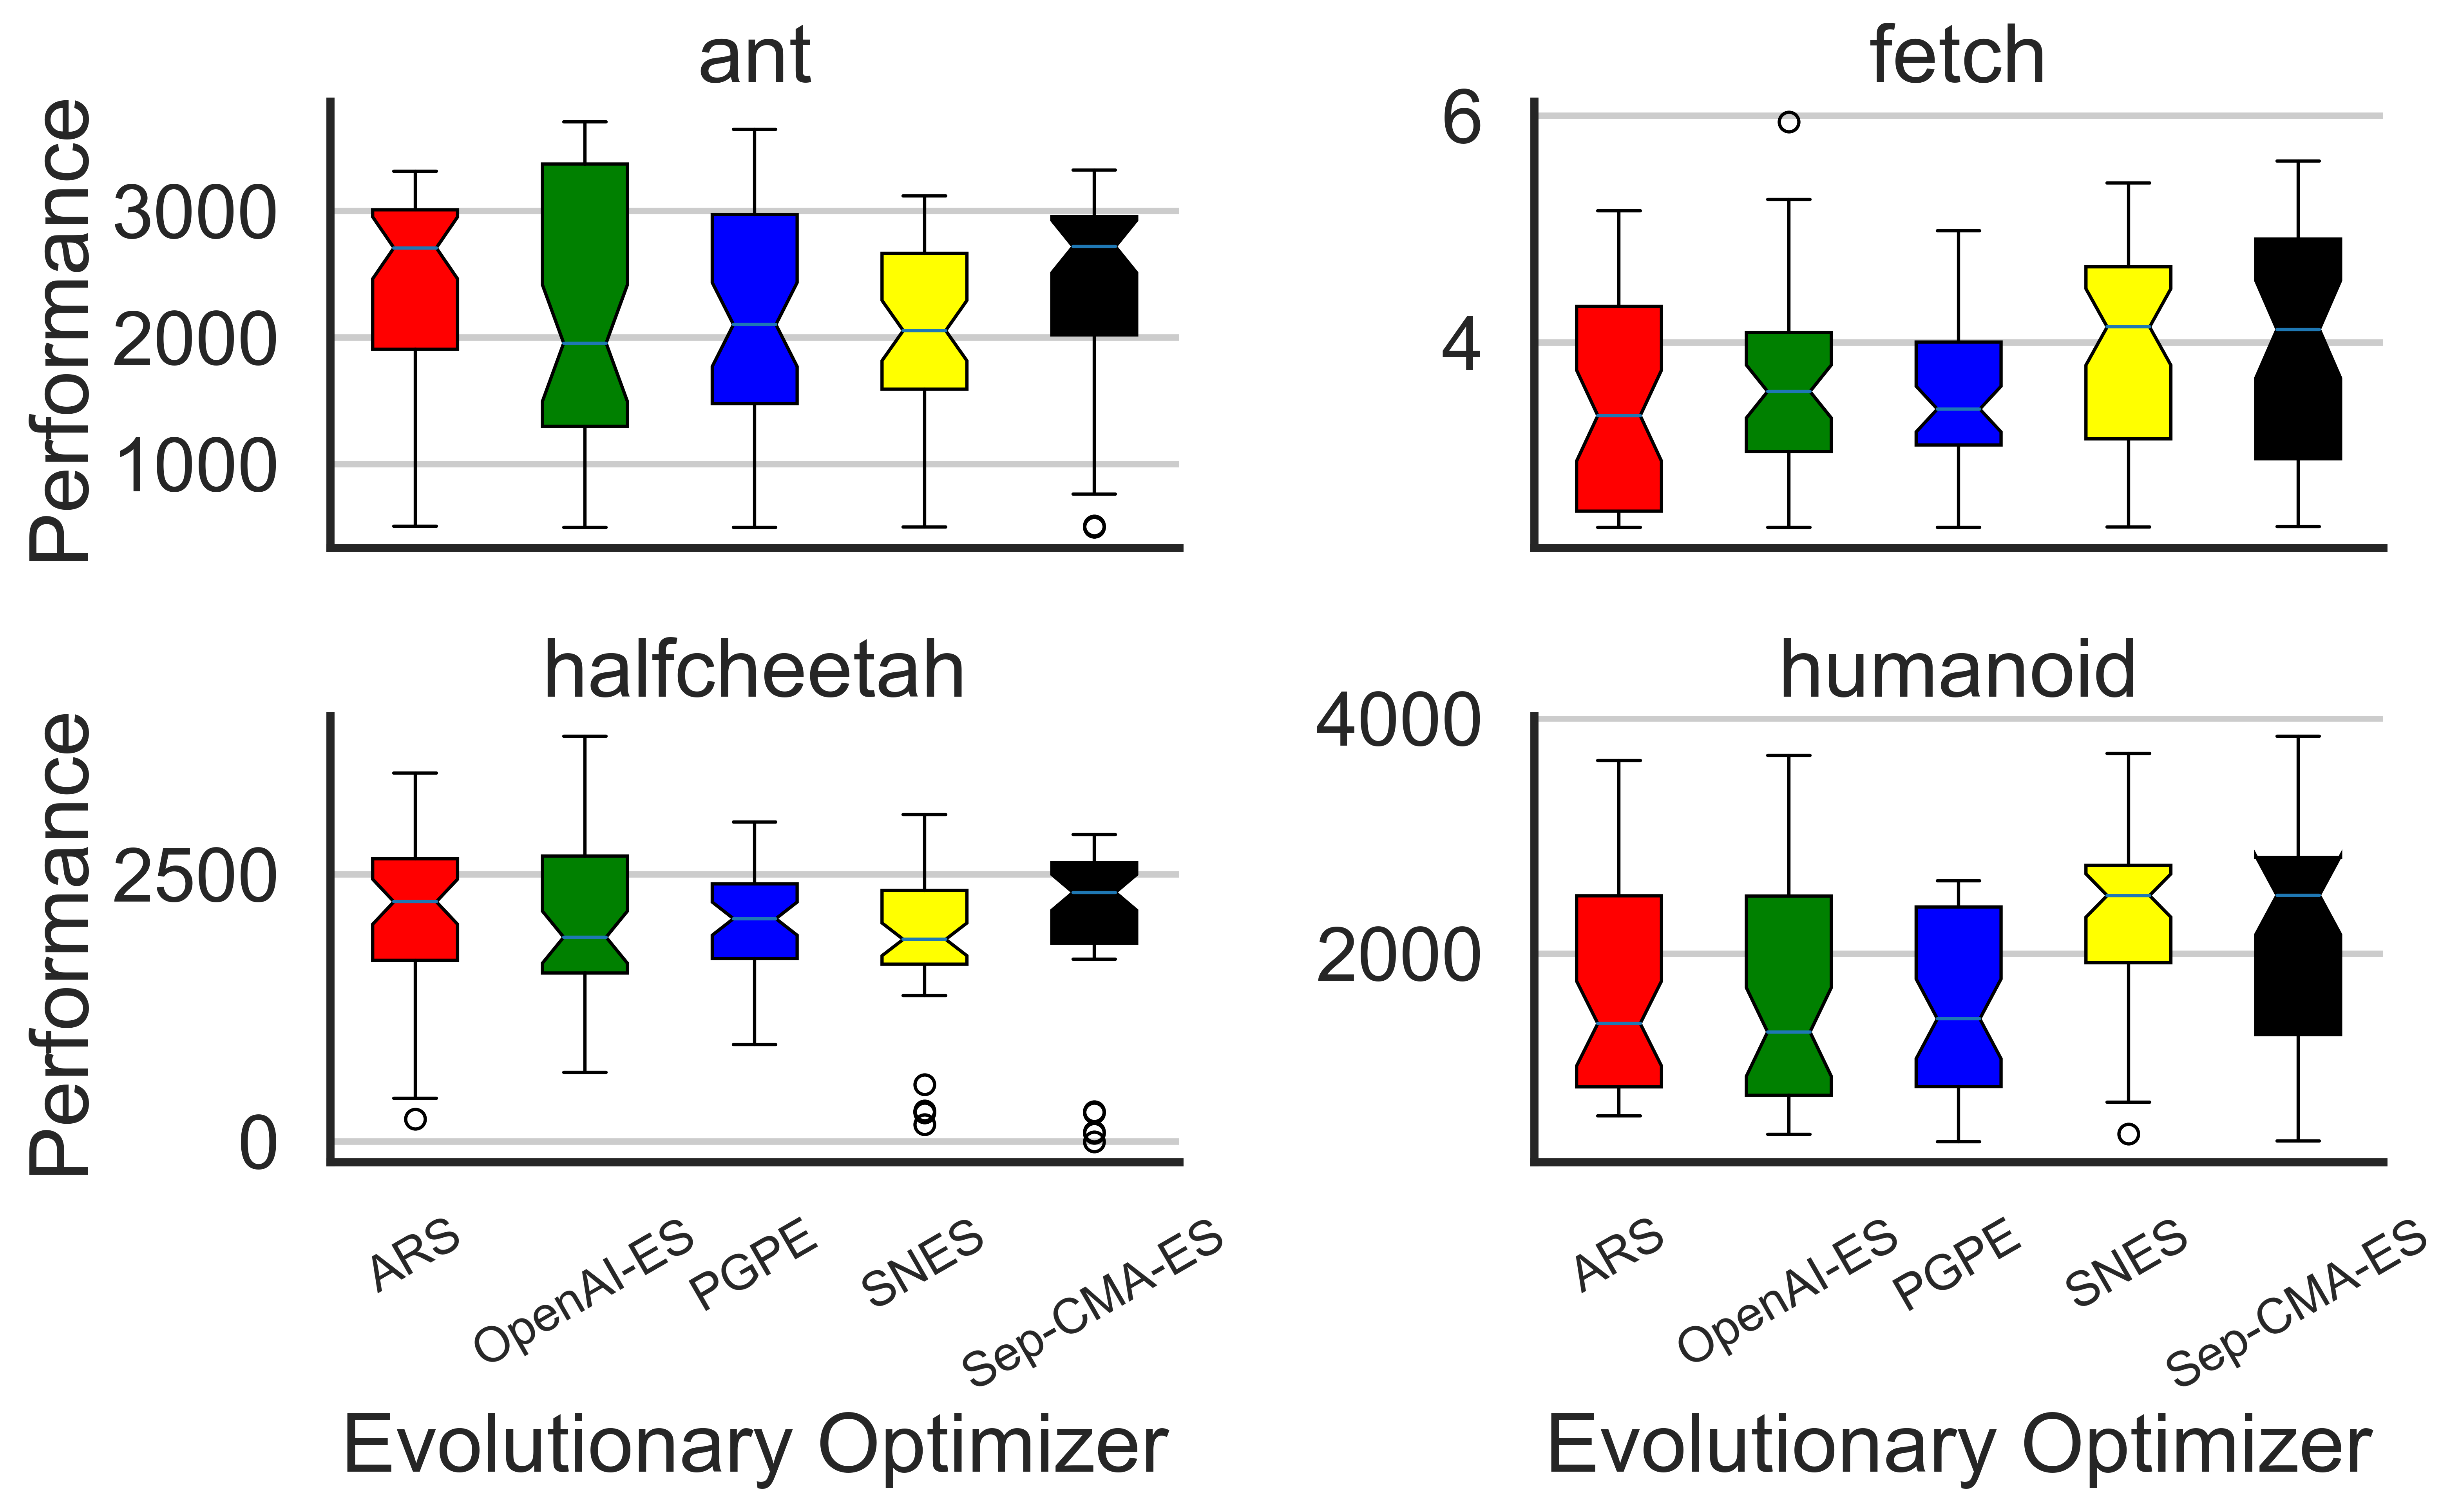

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(11, 7),)

i = 0
for env_name, ax in zip(env_names, axs.flatten()):
    env_results = {}
    for strategy in strategy_names:
        env_results[strategy] = filter_log(hyper_log, meta_log, env_name, strategy, metric)
    env_results = dict(sorted(env_results.items()))

    plot_sensitivity(env_results, fig, ax, title=env_name,
              plot_ylabel=(i==0 or i==2),
              plot_xlabel=(i==2 or i==3))
    i += 1

fig.tight_layout()